In [3]:
%matplotlib notebook
from modsim import *

m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
condition = Condition(mass_B = 0.625*kg, mass_G = 0.04593*kg, dia_B = 0.2*m, 
                      dia_G = 0.043*m, a = 9.81*m /s**2, h = 1*m, numB = 1, duration = 20*s, rho = 1.2*kg/m**3, C_d = 0.5)

def make_system(condition):
    'Using Momentum'
    unpack(condition)
    t_dropB = sqrt(2*(h + (dia_B * numB * 0.5))/a)
    P_dropB = mass_B *numB * a * t_dropB
    t_dropG = sqrt(2*(h + (dia_B * numB)+dia_G/2)/a)
    P_dropG = mass_G * a * t_dropG
    v = (1*P_dropB -P_dropG) / mass_G
    y = (dia_B * numB)+dia_G/2
    area = np.pi * (dia_G/2)**2
    #if v > sqrt(2 * mass_G * a / (rho * area * C_d)):
    #    v = sqrt(2 * mass_G * a / (rho * area * C_d))
    init = State(y=y, v=v)
    
    ts = linspace(0, duration, 101)
    return System(init = init, ts = ts, a=-a, rho = rho, C_d = C_d, area = area, mass_G = mass_G)
system = make_system(condition)
system.init.v





<Quantity(58.320859100248526, 'meter / second')>

<IPython.core.display.Javascript object>


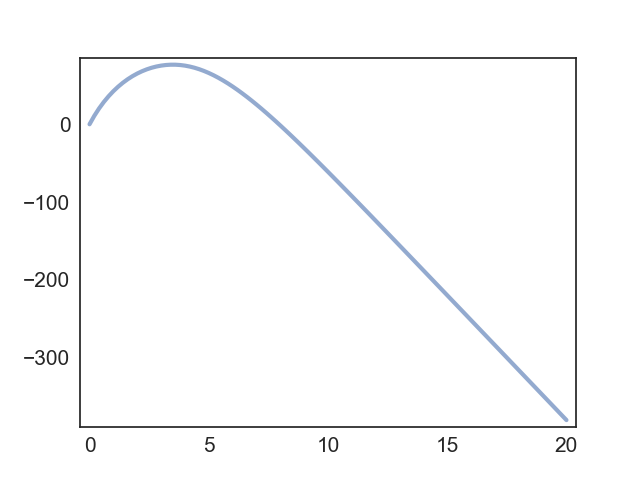

In [4]:
def slope_func(state, t, system):
    
    y, v = state
    unpack(system)
    
    a_grav = system.a
    v = v
    f_drag = -np.sign(v)* rho * v * v * C_d * area / 2
    a_drag = f_drag / mass_G
    a = a_grav + a_drag
    return v, a
slope_func(system.init, 0, system)
run_odeint(system, slope_func)
ys = system.results.y
plot(ys)

In [6]:
def interpolate_range(results):
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak]
    
    return descent, t_peak
interpolate_range(system.results)


(76.92490006745598, 3.4000000000000004)

In [81]:
%matplotlib notebook
from modsim import *

m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
condition = Condition(mass_B = 0.625*kg, mass_G = 0.04593*kg, dia_B = 0.2*m, 
                      dia_G = 0.043*m, a = 9.81*m /s**2, h = 1*m, numB = 10, duration = 30*s, rho = 1.2*kg/m**3, C_d = 0.5)

def make_system(condition):
    unpack(condition)
    #E_dropB = mass_B * numB * a * (h+0.5*dia_B*numB)
    t_dropB = sqrt(2*(h + (dia_B * numB * 0.5))/a)
    E_dropB = 0.5 * mass_B *numB * (a * t_dropB)**2
    t_dropG = sqrt(2*(h + (dia_B * numB)+dia_G/2)/a)
    E_dropG = 0.5 * mass_G * (a * t_dropG)**2
    #E_dropG = mass_G * a * (h + (dia_B * numB)+dia_G/2)
    v = sqrt(2*(E_dropB -E_dropG) / mass_G)
    y = (dia_B * numB)+dia_G/2
    area = np.pi * (dia_G/2)**2
    #if v > sqrt(2 * mass_G * a / (rho * area * C_d)):
    #    v = sqrt(2 * mass_G * a / (rho * area * C_d))
    init = State(y=y, v=v)
    
    ts = linspace(0, duration, 101)
    return System(init = init, ts = ts, a=-a, rho = rho, C_d = C_d, area = area, mass_G = mass_G)
system = make_system(condition)



<IPython.core.display.Javascript object>


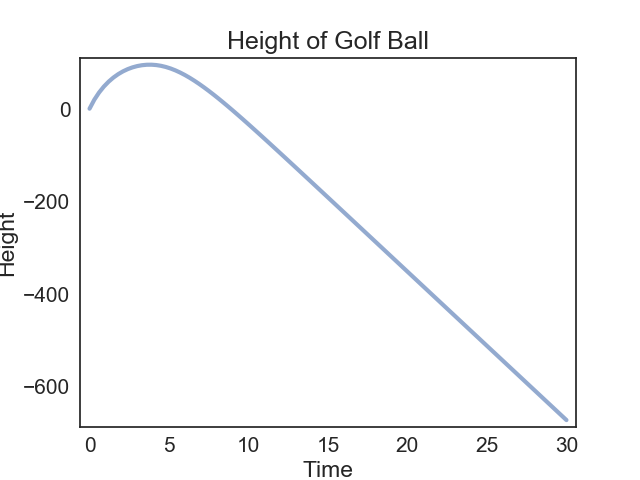

In [82]:
def slope_func(state, t, system):
    
    y, v = state
    unpack(system)
    
    a_grav = system.a
    v = v
    f_drag = -np.sign(v)* rho * v * v * C_d * area / 2
    a_drag = f_drag / mass_G
    a = a_grav + a_drag
    return v, a
slope_func(system.init, 0, system)
run_odeint(system, slope_func)
ys = system.results.y
plot(ys)
xlabel('Time')
ylabel('Height')
title('Height of Golf Ball')

In [84]:
def interpolate_range(results):
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak]
    
    return descent, t_peak
interpolate_range(system.results)

(97.323818198820433, 3.8999999999999999)

<IPython.core.display.Javascript object>


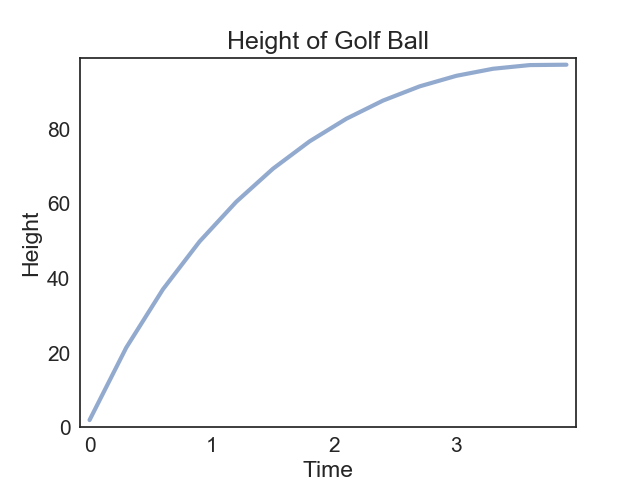

In [85]:
def interp_ranget(results):
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak]
    
    return t_peak
def interp_ranged(results):
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    peak = ys.loc[t_peak]
    
    return peak 
t_peak = interp_ranget(system.results) 
newfig()
plot(ys.loc[0:t_peak])
xlabel('Time')
ylabel('Height')
title('Height of Golf Ball')


In [86]:
def range_func(numB, condition):
    condition.set(numB = numB)
    system = make_system(condition)
    run_odeint(system, slope_func)
    peak = interp_ranged(system.results)
    return peak
range_func(5, condition)

57.064030487348717

1.0 12.4258442928
2.0 24.939324108
3.0 36.4198971192
4.0 47.1102311243
5.0 57.0640304873
6.0 66.2848673785
7.0 74.7439531574
8.0 82.8294134585
9.0 90.2966711003
10.0 97.3238181988
11.0 104.049033347
12.0 110.352758049
13.0 116.290573674
14.0 121.972489079
15.0 127.463454518
16.0 132.684929762
17.0 137.664484788
18.0 142.425505223
19.0 146.98801342
20.0 151.369299513
21.0 155.622275612
22.0 159.770342318
23.0 163.770931531
24.0 167.634990271
25.0 171.372261117


<IPython.core.display.Javascript object>


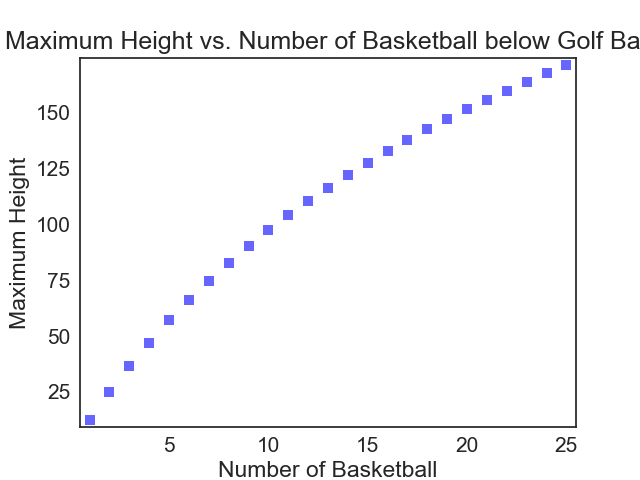

In [87]:
numBs = linspace(1, 25, 25)
sweep = SweepSeries()

for numB in numBs:
    peak = range_func(numB, condition)
    print(numB, peak)
    sweep[numB] = peak
newfig()
plot(sweep, 'bs')
xlabel('Number of Basketball')
ylabel('Maximum Height')
title('Maximum Height vs. Number of Basketball below Golf Ball')